# Signature Identification and Verification

## Significance
A lot of back office processes involve dealing with documents that need to be verified for signatures before processed. Users need to find signatures on the documents and verify their authenticity before proceeding with the concerned process. This is currently done manually by users verifying each and every document, be it application forms, of driver’s license or other legal documents. 


## OBJECTIVE
The problem of identifying a signature and its authenticity could be automated if there is a way to first automate the identification of signature sections on a page and then automating the matching of that signature for authenticity. The objective of this use case is to automate the process of identifying and verifying the signature on a document. 


# Analysis
Incidently the contest requests for idea to be well detailed (they should applied other way around as well, problem seems vague) and step by step solution should be provided. 

I am thinking of writing a daily blog, writing down everything that comes across my mind. 

## Day 1
The problem statement can be divided into 2 different set of problems 
1. Identifying the signature in a document 
2. Verifying the signature against the validation data

Unfortunately both the cases are very vague and no data is provided for the contest. Well it give opportunity of experiment and have assumptions (to hide shortcomings :) )

Lets focus on each problem separately and create a simple workable solution, I would work on improving the accuracy post creating a workable solution for both the problems

### Problem 1 
#### Identifying signature in a document 

Current Problem :- No Data 
Solution :- Google :) 

I have downloaded few samples from google but I am still not sure how to identify a signature, it is based on assumption that data provided will not have any constant format and signature may appear anywhere in the document. (I think I have made the problem more difficult with this assumption, lets give it a try and I will ease some assumptions if it becomes roadblock). :( 

Current Problem :- Emoji not working in Jupyter notebook

Solution :- install package





In [2]:
%matplotlib inline 
import emoji
# testing emoji 
print(emoji.emojize('I am doing :thumbs_up_sign:'))

I am doing :thumbs_up_sign:


In [23]:
# much better
# emoji cheat sheet 
# https://www.webpagefx.com/tools/emoji-cheat-sheet/

Since we have got our emoji problem solved. Lets focus on the problem at hand, how to identify a signature in a document .

Let me see what steps are required
##### Data type 
        I doesn't really matter what the datatype is, we can always convert it into an any format we like. 
        Also I am thinking a pixel level solution would be better here so file format should not be a question.
        But for sake of argument, Ideally I think pdfs would be good input and easier to work with, as text and images can
        easily be identified. 
        But practically thinking all these documents with be output from a scanner or even worse some cam-recorder, 
        So I think working with image file is a more viable option. 
        Decision Made :- image file (JPG)
##### Image Source :- 
        a.whether based on user input 
        b.from a specific path 
        c.through a data pipeline
     Option a and b kind off look same to me. Option c might be too advanced for this activity 
     (Also, creating a data pipeline will change the nature of the problem itself. 
     
     Decision made :- files to be pciked from folder

##### How to identify the signature area
        a.User can select the area where signature is present and program can save the data as a JPG file
        b.We can programmatically identify the signature using some pattern
        
        I think option 1 is easy but it beats the purpose of automating the solution. 
        Anyways lets check how to implement each of these solutions
    

In [ ]:
##### User selects the image
import cv2
import numpy as np
 
 
# Read image
im = cv2.imread("sign15.jpg")

# Select ROI
r = cv2.selectROI(im)

# Crop image
imCrop = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
cv2.imwrite('Manual selection output.png',imCrop)
# Display cropped image
cv2.imshow("Image", imCrop)
cv2.waitKey(0)

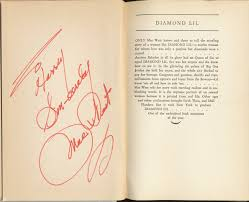

In [4]:
from IPython.display import Image as picture
picture(filename='sign15.jpg')

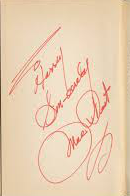

In [3]:
picture(filename='Manual selection output.png')

Well that worked fine. However it hanged my PC while cropping the image (occupational hazzard )


The cropped image is stored as 'Manual selection output.png'

#### Programmatically identify the signature

I am quite lost here, unable to find any smart approach. Internet has also deserted me, No concrete work done in this area ( or atleast published on internet). Although I did find many research papers and few MATLAB examples with regards to image recognition, but not useful to me ( Also I am really bad at reading research paper and don't know MATLAB).

One thing that might work is if signatures are done in a specific color and rest of the document is in different color. 
We might have to
    1. Read the image
    2. Go through each pixel
    3. Check the color of the pixel 
    4. Rewrite the image to remove all items except the signature
    5. If pixel is black then save the pixel otherwise change the pixel color to white
    6. Boxing the area around the signature
    7. Croping the image and saving the image

Rethinking the color choice here, in this strategy signature cannot be black, as most of the test in any document will be black. 
New signature color 'RED'. 

Problem :- How to identify the color of any pixel
Solution :- Covert the pixel into RGB (Red Green Blue) format. This will lead to decrease in quality of the image but seems like only viable option here
    

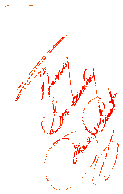

In [5]:
from PIL import Image, ImageEnhance
%matplotlib inline
# Using the same image as in manual selection example
filename = 'C:\\Users\\Hp\\Desktop\\Signuture detection and matching\\sign15.jpg'
# Opening the image file
img = Image.open(filename)

# Enhancing the image by increasing contrast, sharpness and color. Increasing the color deepens the prominant colors and 
#helps identify 'RED'
bw = ImageEnhance.Color(img).enhance(1.0)
bright = ImageEnhance.Brightness(bw).enhance(1.0)
bright1= ImageEnhance.Contrast(bright).enhance(2.0)
contrast = ImageEnhance.Sharpness(bright1).enhance(2.0)
color = ImageEnhance.Color(contrast).enhance(2.0)
# contrast = ImageEnhance.Contrast(img).enhance(1.0)
# sign = contrast.convert("RGBA")

# Convert the picture to RGBA scale
sign=color.convert("RGBA")
datas = sign.getdata()

''' Here I am assuming that the signature is done in Red. Now in this loop I am iterating each pixel checking the color 
and saving the pixel eith directly or after rewriting

Logic used here
R - 0 to 255
G - 0 to 255
B - 0 to 255

Red color can appear in many combinations of these 3 colors but fisrt word should contain high value (first 32 bytes) and 
the Green and Blue components should contain lower values.

There is no hard and fast rule for this. But I find this logic to be working , so we will go ahead with this

Rule here is
1. Check For Red Component if it is less than 220, meaning that the RED component in the PIXEL is low so most probably
the PIXEL will not be of RED color, hence change the PIXEL color to white (255*255*255)
2. If Red is more than 220 but either Green or Blue has value larger than 100, then again change the PIXEL color to white. 
Even though the PIXEL has large RED component due to mixing with Green or Blue the resultant color will not be RED
3. If both the previous conditions don't satisfy then save the PIXEL as it is, it is part of our signature
'''
newData = []
for item in datas:
    if item[0] <  220: 
      newData.append((255, 255, 255,1))
    elif item[1] >  100 or item[2] > 100: 
      newData.append((255, 255, 255,1))
    else:
      newData.append(item)

''' haivng issues with directly using the components for reasons not known. Hence saving the file 
and will reopen it for cropping'''
sign.putdata(newData)
sign.save("signature.png", "PNG")

''' reopening the file for croping'''
img = Image.open("signature.png")
img = img.convert("RGBA")
pixdata = img.load()

''' Setting start and end position to image end points'''
start_pixel = [img.size[0], img.size[1]]
end_pixel = [0,0]

''' Now looping through the image to see if we find a red PIXEL. Positioning start and end position based on pixel color'''
for y in range(img.size[1]):
    for x in range(img.size[0]):
      if pixdata[x, y][0] > 220 and pixdata[x,y][1] < 255:
        if x < start_pixel[0]:
          start_pixel[0] = x
        if y < start_pixel[1]:
          start_pixel[1] = y
        if x > end_pixel[0]:
          end_pixel[0] = x
        if y > end_pixel[1]:
          end_pixel[1] = y

# additional padding and saving the image
crop_box = (start_pixel[0]-5, start_pixel[1]-5, end_pixel[0]+5, end_pixel[1]+5)
signature = img.crop(crop_box)
signature.save("auto selection output.png","PNG")

from IPython.display import Image as picture 
picture(filename="auto selection output.png")

Loss of quality as expected but detection is spot on. One additional advantage we got from this was noise was mostly removed, this we were not able to do in manual selection method. I think this might work.